In [1]:
import numpy as np
import sys
import matplotlib as mpl
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import os
sys.path.insert(1, str( (Path().absolute())  ) + "/src")

from parameters import occ_for_power_BOAK, construction_duration_for_power_BOAK,\
    OM_for_power_one_unit, construction_duration_for_power_BOAK, popt_OM_multiple
from parameters import xdata1_OCC, ydata1_OCC, xdata_OM  , ydata_OM, xData_duration , yData_duration, x1_OM , x2_OM , x3_OM, y1_OM , y2_OM , y3_OM

from economic_FOMs import tot_TCI_multiple_reactors_starting_from_BOAK, level_cost_of_energy_starting_from_BOAK, level_cost_of_energy_starting_from_BOAK_thermal
from schedule_similar_reactors import num_reactors_needed_for_capacity_factor_weeks_apprioach,  capacity_factor_weeks_approach


In [2]:
num_reactors_needed = 1
reactor_power = 300
levelization_period_0 = int(40*365/7)
elec_price_0 = 0
tot_demand= num_reactors_needed * reactor_power
schedule_results = capacity_factor_weeks_approach( num_reactors_needed, reactor_power, levelization_period_0, tot_demand)
Tot_MWh_generated_per_year_list = schedule_results[3]
MWh_generated_per_year_per_demand_list = schedule_results[4]
MWh_excess_per_year_list = schedule_results[5]


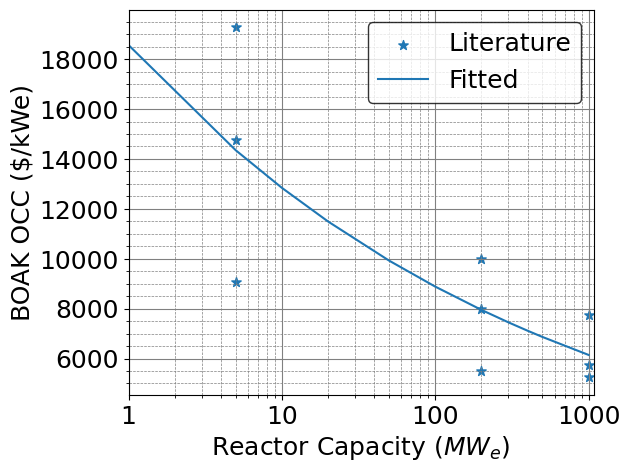

In [3]:
# OCC BOAK
fig = plt.figure(figsize=(6, 5))

power_list = [1000, 500, 400, 300, 200, 100, 50, 20, 10, 5, 1]

OCC_list =[]

for p in power_list :
    occ1 = occ_for_power_BOAK(p)
    OCC_list .append(occ1)
plt.scatter(xdata1_OCC, ydata1_OCC ,marker = "*", s = 50, label = "Literature")   
plt.plot(power_list , OCC_list , label = "Fitted")  
plt.xscale('log') 
plt.grid(which='major', color='grey', linewidth=0.8)
     
plt.gca().xaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
plt.gca().xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
       
plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())


plt.xticks( [1, 10, 100 ,1000])
plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
plt.minorticks_on()
plt.xlabel('Reactor Capacity ($MW_e$)', fontsize=18) 
plt.ylabel('BOAK OCC ($/kWe)', fontsize=18)  
plt.legend( loc='upper right', fontsize=18, edgecolor='black', fancybox=True) 

plt.yticks(fontsize= 18)
plt.xticks(fontsize= 18)
plt.xlim(1, 1080)
plt.savefig('results/OCC_BOAK.png', bbox_inches='tight')
plt.show()       

  

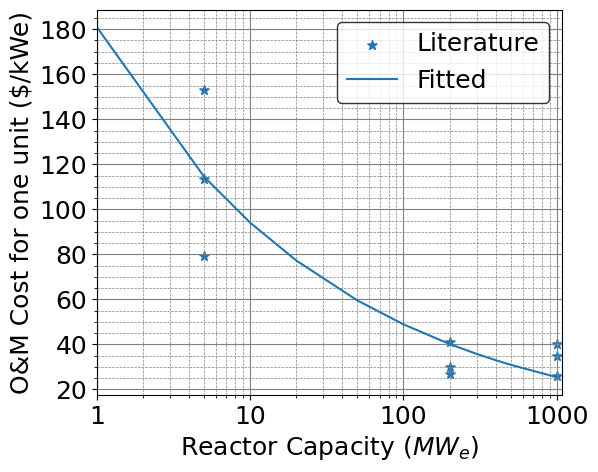

In [4]:
power_list = [1000, 500, 400, 300, 200, 100, 50, 20, 10, 5, 1]
fig = plt.figure(figsize=(6, 5))
OM_list =[]

for p in power_list :
    om1 = OM_for_power_one_unit(p)
    OM_list .append(om1)

OM_list_ref =[]


plt.scatter(xdata_OM  , ydata_OM ,marker = "*", s = 50, label = "Literature")       
plt.plot(power_list , OM_list , label = "Fitted")  

plt.xscale('log') 
plt.grid(which='major', color='grey', linewidth=0.8)
     
plt.gca().xaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
plt.gca().xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
       
plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())


plt.xticks( [1, 10, 100 ,1000])
plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
plt.minorticks_on()
plt.xlabel('Reactor Capacity ($MW_e$)', fontsize=18) 
plt.ylabel('O&M Cost for one unit ($/kWe)', fontsize=18)  

plt.legend( loc='upper right', fontsize=18, edgecolor='black', fancybox=True) 

plt.yticks(fontsize= 18)
plt.xticks(fontsize= 18)
plt.xlim(1, 1080)
plt.savefig('results/OM_OneUnit.png', bbox_inches='tight')
plt.show()         


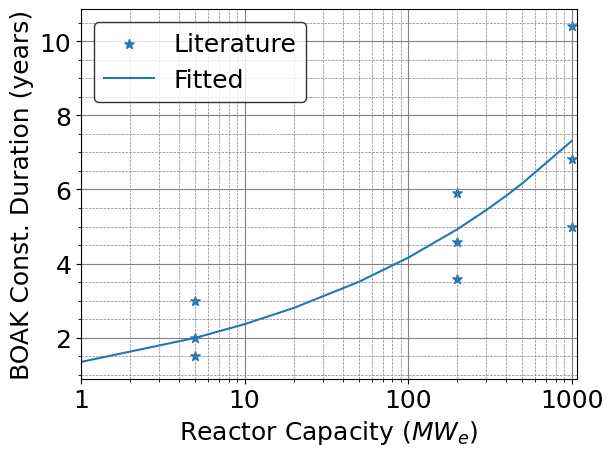

In [5]:
power_list = [1000, 500, 400, 300, 200, 100, 50, 20, 10, 5, 1]

cons_duration_list =[]

for p in power_list :
    cd1 = construction_duration_for_power_BOAK(p)
    cons_duration_list.append(cd1 )
plt.scatter(xData_duration , np.array(yData_duration)/12 ,marker = "*", s = 50, label = "Literature")     

plt.plot(power_list ,  np.array(cons_duration_list)/12  , label = "Fitted")   

plt.xscale('log') 
plt.grid(which='major', color='grey', linewidth=0.8)
     
plt.gca().xaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
plt.gca().xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
       
plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())


plt.xticks( [1, 10, 100 ,1000])
plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
plt.minorticks_on()
plt.xlabel('Reactor Capacity ($MW_e$)', fontsize=18) 
plt.ylabel('BOAK Const. Duration (years)', fontsize=18)  

plt.legend( loc='upper left', fontsize=18, edgecolor='black', fancybox=True) 

plt.yticks(fontsize= 18)
plt.xticks(fontsize= 18)
plt.xlim(1, 1080)
plt.savefig('results/BOAK_Duration.png', bbox_inches='tight')
plt.show()         




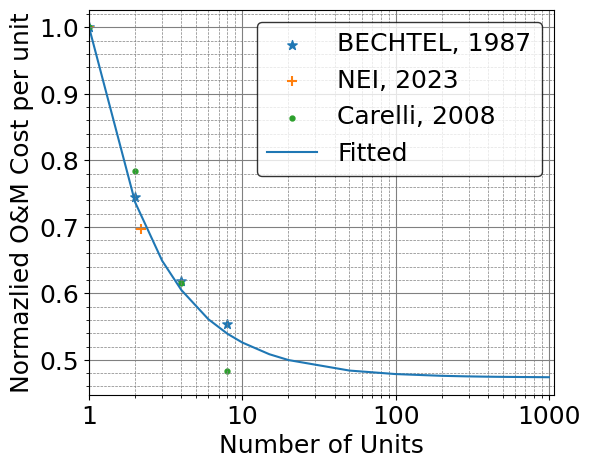

In [6]:
fig = plt.figure(figsize=(6, 5))
num_units_list = [1, 2, 3, 4, 6, 8, 10, 15, 20, 50, 100, 200, 300, 400, 500, 1000]
reduction_factor_list = []

for num in num_units_list:
    reduction_factor = (popt_OM_multiple[0]/num) + 1-popt_OM_multiple[0]
    reduction_factor_list.append(reduction_factor)
    
# O & M Cost reduction with multiple units
plt.scatter(x1_OM, y1_OM, label = "BECHTEL, 1987", marker = "*", s = 50)
plt.scatter(x2_OM, y2_OM, label = 'NEI, 2023', marker = "+", s = 50)
plt.scatter(x3_OM, y3_OM, label = 'Carelli, 2008',  marker = ".", s = 50)
plt.plot(num_units_list , reduction_factor_list, label = "Fitted")  

plt.xscale('log') 
plt.grid(which='major', color='grey', linewidth=0.8)
     
plt.gca().xaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
plt.gca().xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
       
plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())


plt.xticks( [1, 10, 100 ,1000])
plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
plt.minorticks_on()
plt.xlabel('Number of Units', fontsize=18) 
plt.ylabel('Normazlied O&M Cost per unit', fontsize=18)  

plt.legend( loc='upper right', fontsize=18, edgecolor='black', fancybox=True) 

plt.yticks(fontsize= 18)
plt.xticks(fontsize= 18)
plt.xlim(1, 1080)
plt.savefig('results/OM_reduction.png', bbox_inches='tight')
plt.show()         

# TCI

In [7]:
# Electricity Prices
# According to: eia.gov/electricity/wholesale
# I have used the 2023 table: https://www.eia.gov/electricity/wholesale/xls/archive/ice_electric-2023final.xlsx
# According to this table, the median (over the year) is 47 $/MWh and the 5th percentile is 25 $/MWh

# looking at this source: https://enerknol.com/average-2024-u-s-wholesale-electricity-prices-projected-to-be-similar-to-2023-levels-eia/
# the wholesale prices range between 33 and 67
# therefore in this work, we consider the following wholesale prices
elec_price_0 = 0 # no electricty is exported to the grid
elec_price_1 = 20
elec_price_2 = 40
elec_price_3 = 60

# TCI for target demand and reliability

In [ ]:
import matplotlib as mpl

# delete the output file is exists
filename = f"results/TCI_for_demand_reliability.csv"
try:
    os.remove(filename)
except OSError:
    pass
    
# initialize a dataframe
results = []
    
power_list = [1000, 900 , 800, 700, 600, 500, 400, 300, 200, 100  ,50,  20, 5, 1]
min_capacity_factor_criteria_list = [0.9, 0.95,  0.99,  1]
interest_rate = 0.06
levelization_period_0 = int(365 * 40/7) # 40 years
overall_capacity_factor_criteria = 0 # has no effect

for tot_demand in [500, 1000, 5000, 10000] :
    print(f' Demand is {tot_demand} MWe')
    
    
    for min_capacity_factor_criteria in min_capacity_factor_criteria_list:
        tot_TCI_list = []
        
        for reactor_power in power_list:
            
            num_reactors_needed = int(np.ceil(num_reactors_needed_for_capacity_factor_weeks_apprioach(overall_capacity_factor_criteria,\
                            min_capacity_factor_criteria,reactor_power ,levelization_period_0, tot_demand)))

            tot_TCI = (tot_TCI_multiple_reactors_starting_from_BOAK (reactor_power, interest_rate, num_reactors_needed)) / 1000000000
            results.append({'demand': tot_demand, 'capacity factor criteria' :min_capacity_factor_criteria , 'power':reactor_power, 'TCI':tot_TCI })
            tot_TCI_list.append(tot_TCI)
        
df1 = pd.DataFrame(results)
 
df1.to_csv(filename , mode='a',index = False)

 Demand is 500 MWe
 Demand is 1000 MWe
 Demand is 5000 MWe
 Demand is 10000 MWe


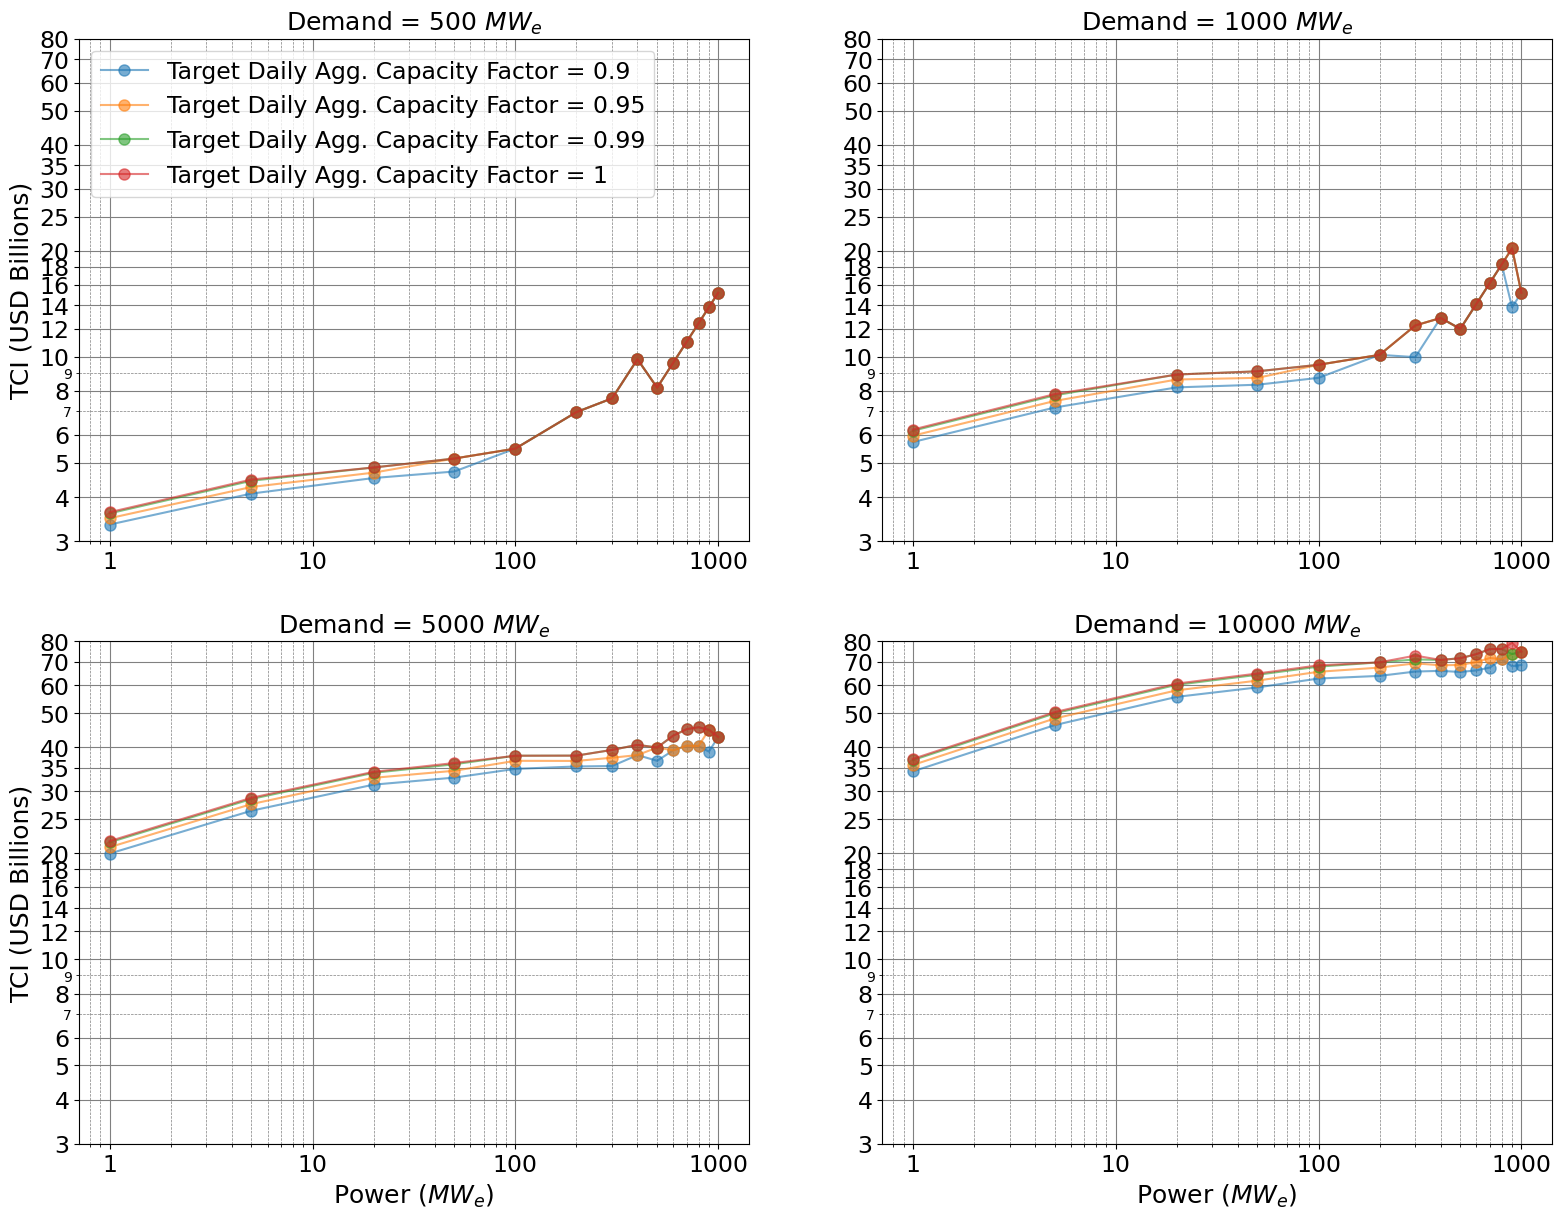

In [108]:
fig = plt.figure(figsize=(19, 30))
dem_list = [500, 1000, 5000, 10000]
for ii in range (len(dem_list)):
    dem =dem_list[ii]
    # fig = plt.figure(figsize=(8, 5))
    # plt.title( f"Demand  = {dem} $MW_e$ ",  fontsize=18)
    
    
    plt.subplot(4, 2, ii+1)
    plt.title(f'Demand = {dem} $MW_e$', fontsize=18)
    dem_data = df1.loc[df1['demand'] == dem]
    for cap_fact in min_capacity_factor_criteria_list :
        CF_data = dem_data.loc[dem_data['capacity factor criteria'] == cap_fact]
        plt.plot(CF_data['power'], CF_data['TCI'], '-o' , markersize = 8,  alpha=0.6 ,label = f"Target Daily Agg. Capacity Factor = {cap_fact}")
        plt.xscale('log')
        plt.yscale('log')
        if dem == 500:
            plt.legend( loc='upper left', fontsize=17 , ncol=1)
       
        plt.grid(which='major', color='grey', linewidth=0.8)
    
        plt.gca().yaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
        plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
        plt.gca().xaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
        plt.gca().xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
        
        plt.gca().yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
        plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
        plt.gca().yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
        
        # ticks_list = np.linspace( 2*np.floor((min(CF_data['TCI']))/2)    , 2*np.ceil((max(CF_data['TCI']))/2), int(1    +    np.ceil((max(CF_data['TCI']))/2)   -    np.floor((min(CF_data['TCI']))/2)   )  )
        plt.yticks([3,4,5,6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 50, 60, 70, 80])
        
        plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
        plt.minorticks_on()
        
        plt.yticks(fontsize=17)
        plt.xticks(fontsize=17)
        plt.ylim( 3, 80)
        
        if dem == 5000 or dem == 10000:
             plt.xlabel('Power ($MW_e$)', fontsize=18)
        if dem == 500 or dem == 5000:     
            plt.ylabel('TCI (USD Billions)', fontsize=18)
             
plt.savefig('TCI.png')
plt.show()      

# LCOE  = f (power, reliability and demand)

In [10]:
# delete the output file is exists
filename = "results/LCOE_for_demand_reliability.csv"
try:
    os.remove(filename)
except OSError:
    pass

LCOE_results = []
power_list = [1000, 900 , 800, 700, 600, 500, 400, 300, 200, 100  ,50,  20, 5, 1]
interest_rate = 0.06
levelization_period_0 = int(365 * 40/7)
overall_capacity_factor_criteria = 0 # has no effect

for tot_demand in  [500, 1000, 5000, 10000]:
    
    for min_capacity_factor_criteria in [0.9, 0.95, 0.99, 1]:
        print(f'Demand is {tot_demand} & The daily availability criteria is {min_capacity_factor_criteria}')
        for reactor_power in power_list:
            num_reactors_needed = int(np.ceil(num_reactors_needed_for_capacity_factor_weeks_apprioach(overall_capacity_factor_criteria,\
                            min_capacity_factor_criteria,reactor_power ,levelization_period_0, tot_demand)))
            
            schedule_results = capacity_factor_weeks_approach( num_reactors_needed, reactor_power, levelization_period_0, tot_demand)
            
            Tot_MWh_generated_per_year_list = schedule_results[3]
            MWh_generated_per_year_per_demand_list = schedule_results[4]
            MWh_excess_per_year_list = schedule_results[5]
            lcoe_0 = level_cost_of_energy_starting_from_BOAK( interest_rate, reactor_power, num_reactors_needed, Tot_MWh_generated_per_year_list,MWh_generated_per_year_per_demand_list, MWh_excess_per_year_list, elec_price_0)
            lcoe_1 = level_cost_of_energy_starting_from_BOAK( interest_rate, reactor_power, num_reactors_needed, Tot_MWh_generated_per_year_list,MWh_generated_per_year_per_demand_list, MWh_excess_per_year_list, elec_price_1)
            lcoe_2 = level_cost_of_energy_starting_from_BOAK( interest_rate, reactor_power, num_reactors_needed, Tot_MWh_generated_per_year_list,MWh_generated_per_year_per_demand_list, MWh_excess_per_year_list, elec_price_2)
            lcoe_3 = level_cost_of_energy_starting_from_BOAK( interest_rate, reactor_power, num_reactors_needed, Tot_MWh_generated_per_year_list,MWh_generated_per_year_per_demand_list, MWh_excess_per_year_list, elec_price_3)

            LCOE_results.append({'demand': tot_demand, 'capacity factor criteria' :min_capacity_factor_criteria , 'power':reactor_power, 'lcoe_O':lcoe_0, 'lcoe_1':lcoe_1, 'lcoe_2':lcoe_2, 'lcoe_3':lcoe_3 })
            
     
df_LCOE = pd.DataFrame(LCOE_results)
df_LCOE .to_csv(filename , mode='a',index = False)     
            

500 0.9
500 0.95
500 0.99
500 1
1000 0.9
1000 0.95
1000 0.99
1000 1
5000 0.9
5000 0.95
5000 0.99
5000 1
10000 0.9
10000 0.95
10000 0.99
10000 1


NameError: name 'df_LCOE' is not defined

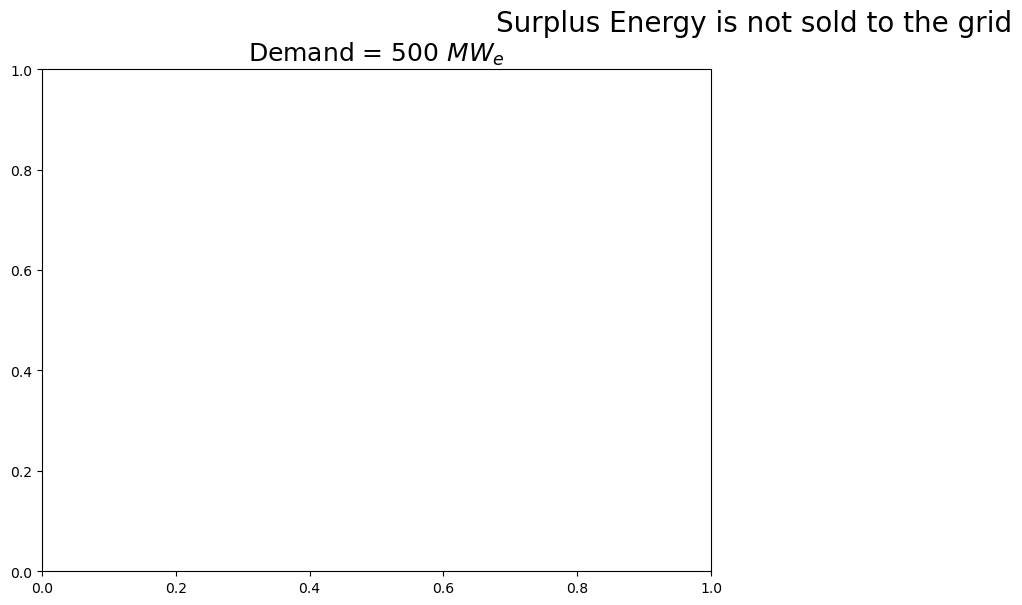

In [47]:
fig = plt.figure(figsize=(19, 30))
dem_list = [500, 1000, 5000, 10000]

# Select the electricty price to show:
price = 0
if price ==0:
    selected_LCOE = 'lcoe_O'
    fig.suptitle("Surplus Energy is not sold to the grid", y = 0.9, fontsize=20)

elif price ==1:  
    selected_LCOE = 'lcoe_1'
    fig.suptitle(f"Surplus Energy is sold to the grid. Electricity price is {elec_price_1} $/MWh", y = 0.9, fontsize=20)
elif price ==2:  
    selected_LCOE = 'lcoe_2'
    fig.suptitle(f"Surplus Energy is sold to the grid. Electricity price is {elec_price_2}$/ MWh", y = 0.9, fontsize=20)
elif price ==3:
    selected_LCOE = 'lcoe_3'
    fig.suptitle(f"Surplus Energy is sold to the grid. Electricity price is {elec_price_3} $/MWh", y = 0.9, fontsize=20)




for ii in range (len(dem_list)):
    dem = dem_list[ii]
    # fig = plt.figure(figsize=(8, 5))
    # plt.title( f"Demand  = {dem} $MW_e$ ",  fontsize=18)
    
    
    plt.subplot(4, 2, ii+1)
    plt.title(f'Demand = {dem} $MW_e$', fontsize=18)
    dem_data = df_LCOE.loc[df_LCOE['demand'] == dem]
    
    for cap_fact in [0.9, 0.95, 0.99, 1]:
        
        CF_data = dem_data.loc[dem_data['capacity factor criteria'] == cap_fact]
        plt.plot(CF_data['power'], CF_data[selected_LCOE], '-o' , markersize = 8,  alpha=0.6 ,label = f"Target Daily Agg. Capacity Factor = {cap_fact}")
        plt.xscale('log')
        plt.yscale('log')
        
        if dem == 500:
            plt.legend( loc='upper left', fontsize=17 , ncol=1)
       
        plt.grid(which='major', color='grey', linewidth=0.8)
    
        plt.gca().yaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
        plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
        plt.gca().xaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
        plt.gca().xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
        
        plt.gca().yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
        plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
        plt.gca().yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
        
        plt.yticks([65, 70, 75, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300])
        
        plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
        plt.minorticks_on()
        
        plt.yticks(fontsize=17)
        plt.xticks(fontsize=17)
        # # plt.ylim( 3, 80)
        
        if dem == 5000 or dem == 10000:
             plt.xlabel('Power ($MW_e$)', fontsize=18)
        if dem == 500 or dem == 5000:     
            plt.ylabel('LCOE ($/MWh)', fontsize=18)
             
# plt.savefig('LCOE0.png')
plt.show()

In [96]:
capacity_of_LCOE_min = []
selected_LCOE = 'lcoe_3'
for ii in range (len(dem_list)):
    dem = dem_list[ii]
    dem_data = df_LCOE.loc[df_LCOE['demand'] == dem]
    for cap_fact in [0.9, 0.95, 0.99, 1]:
        CF_data = dem_data.loc[dem_data['capacity factor criteria'] == cap_fact]
        index = ( CF_data[selected_LCOE]).idxmin()
        power_of_min_lcoe = CF_data['power'][index ]
        capacity_of_LCOE_min.append({'demand': dem, 'capacity factor criteria' :cap_fact  , 'power_of_min_lcoe':power_of_min_lcoe, 'lcoe_min': (np.round(min(CF_data[selected_LCOE]),2)) })

df_LCOE_min= pd.DataFrame(capacity_of_LCOE_min)
        # plt.plot(CF_data['power'], CF_data[selected_LCOE], '-o' , markersize = 8,  alpha=0.6 ,label = f"Target Daily Agg. Capacity Factor = {cap_fact}")

In [97]:
filename = f'results/capacities_of_min_lcoe_{selected_LCOE }.csv' 
df_LCOE_min
df_LCOE_min .to_csv(filename , mode='a',index = False) 

# what if the interest rate is lower

In [98]:
filename = "results/LCOE_for_demand_reliability_low_interest_rate.csv"
try:
    os.remove(filename)
except OSError:
    pass

LCOE_results_lo = []
power_list = [1000, 900 , 800, 700, 600, 500, 400, 300, 200, 100  ,50,  20, 5, 1]
interest_rate = 0.04
levelization_period_0 = int(365 * 40/7)
overall_capacity_factor_criteria = 0 # has no effect

for tot_demand in  [500, 1000, 5000, 10000]:
    
    for min_capacity_factor_criteria in [0.9, 0.95, 0.99, 1]:
        print(f'Demand is {tot_demand} & The daily availability criteria is {min_capacity_factor_criteria}')

        for reactor_power in power_list:
            num_reactors_needed = int(np.ceil(num_reactors_needed_for_capacity_factor_weeks_apprioach(overall_capacity_factor_criteria,\
                            min_capacity_factor_criteria,reactor_power ,levelization_period_0, tot_demand)))
            
            schedule_results = capacity_factor_weeks_approach( num_reactors_needed, reactor_power, levelization_period_0, tot_demand)
            
            Tot_MWh_generated_per_year_list = schedule_results[3]
            MWh_generated_per_year_per_demand_list = schedule_results[4]
            MWh_excess_per_year_list = schedule_results[5]
            lcoe_0 = level_cost_of_energy_starting_from_BOAK( interest_rate, reactor_power, num_reactors_needed, Tot_MWh_generated_per_year_list,MWh_generated_per_year_per_demand_list, MWh_excess_per_year_list, elec_price_0)
            lcoe_1 = level_cost_of_energy_starting_from_BOAK( interest_rate, reactor_power, num_reactors_needed, Tot_MWh_generated_per_year_list,MWh_generated_per_year_per_demand_list, MWh_excess_per_year_list, elec_price_1)
            lcoe_2 = level_cost_of_energy_starting_from_BOAK( interest_rate, reactor_power, num_reactors_needed, Tot_MWh_generated_per_year_list,MWh_generated_per_year_per_demand_list, MWh_excess_per_year_list, elec_price_2)
            lcoe_3 = level_cost_of_energy_starting_from_BOAK( interest_rate, reactor_power, num_reactors_needed, Tot_MWh_generated_per_year_list,MWh_generated_per_year_per_demand_list, MWh_excess_per_year_list, elec_price_3)

            LCOE_results_lo.append({'demand': tot_demand, 'capacity factor criteria' :min_capacity_factor_criteria , 'power':reactor_power, 'lcoe_O':lcoe_0, 'lcoe_1':lcoe_1, 'lcoe_2':lcoe_2, 'lcoe_3':lcoe_3 })
            
     
df_LCOE_lo = pd.DataFrame(LCOE_results_lo)
df_LCOE_lo.to_csv(filename , mode='a',index = False)     
            

500 0.9
500 0.95
500 0.99
500 1
1000 0.9
1000 0.95
1000 0.99
1000 1
5000 0.9
5000 0.95
5000 0.99
5000 1
10000 0.9
10000 0.95
10000 0.99
10000 1


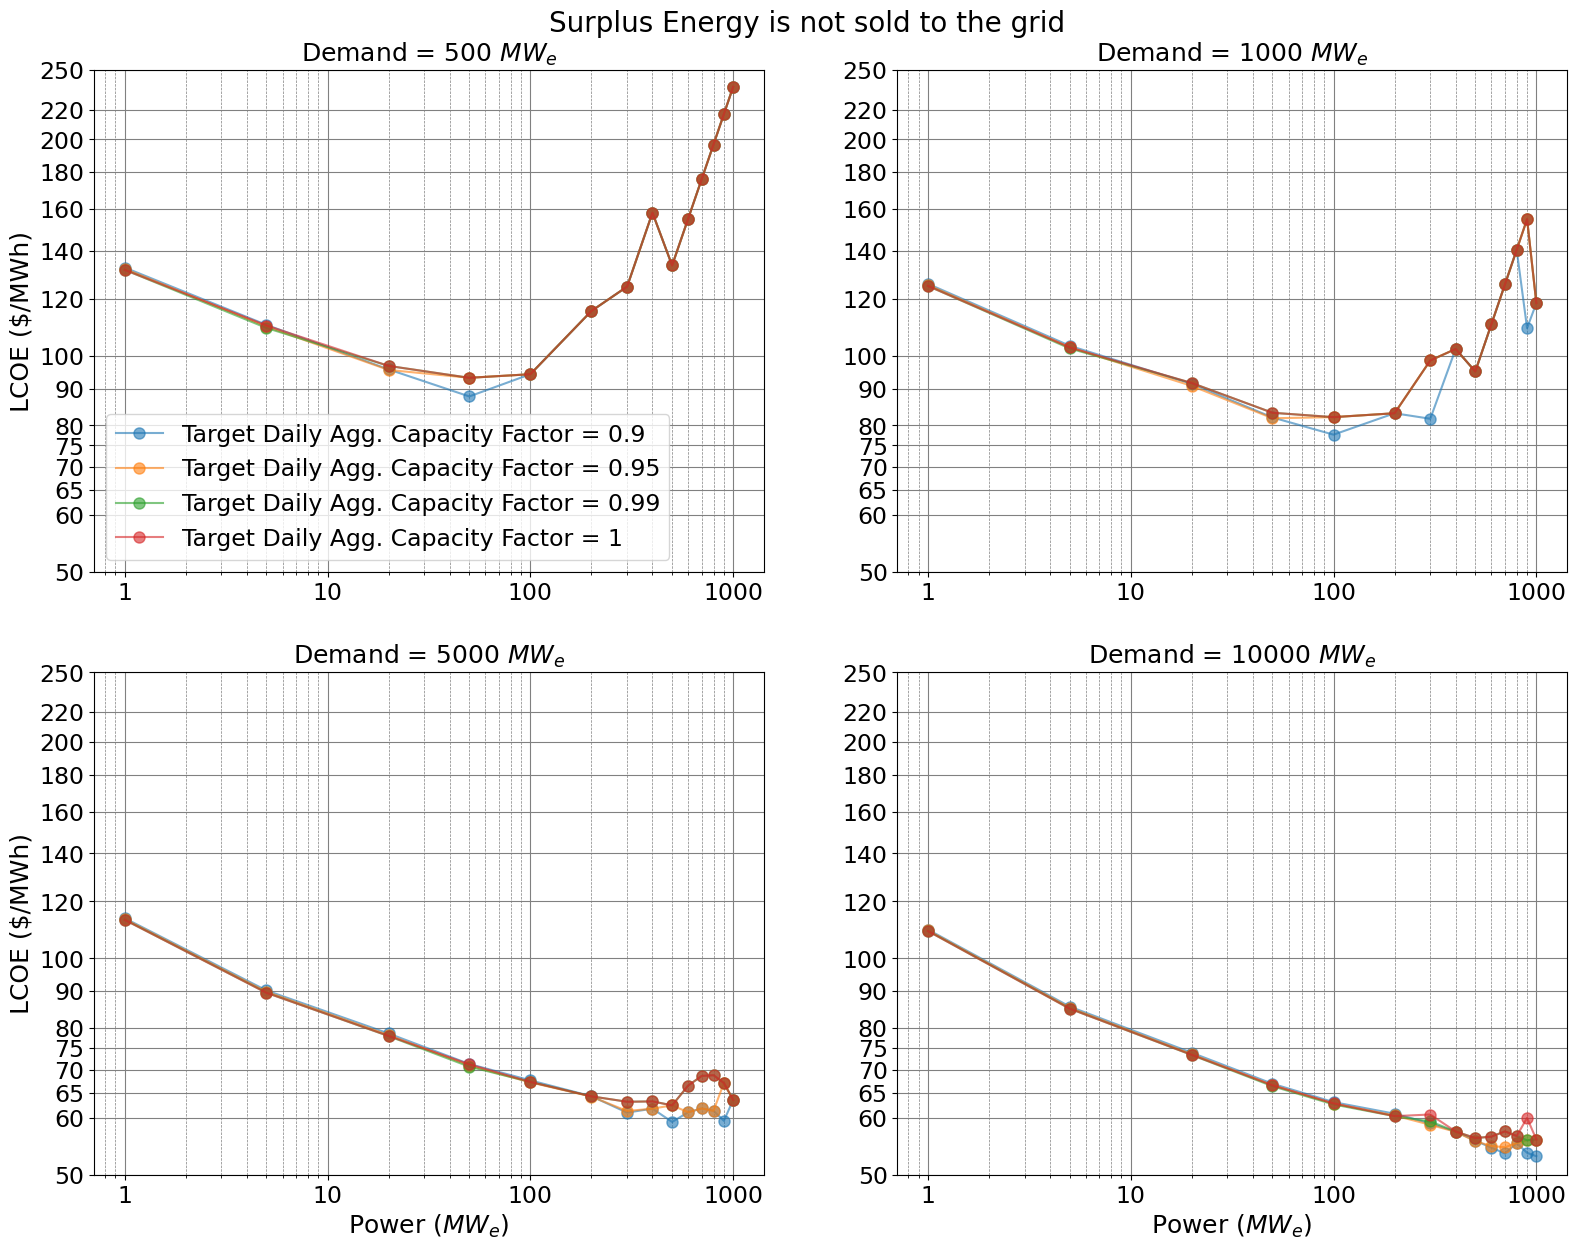

In [110]:
fig = plt.figure(figsize=(19, 30))
dem_list = [500, 1000, 5000, 10000]

# Select the electricty price to show:
price = 0
if price ==0:
    selected_LCOE = 'lcoe_O'
    fig.suptitle("Surplus Energy is not sold to the grid", y = 0.9, fontsize=20)

elif price ==1:  
    selected_LCOE = 'lcoe_1'
    fig.suptitle(f"Surplus Energy is sold to the grid. Electricity price is {elec_price_1} $/MWh", y = 0.9, fontsize=20)
elif price ==2:  
    selected_LCOE = 'lcoe_2'
    fig.suptitle(f"Surplus Energy is sold to the grid. Electricity price is {elec_price_2}$/ MWh", y = 0.9, fontsize=20)
elif price ==3:
    selected_LCOE = 'lcoe_3'
    fig.suptitle(f"Surplus Energy is sold to the grid. Electricity price is {elec_price_3} $/MWh", y = 0.9, fontsize=20)




for ii in range (len(dem_list)):
    dem = dem_list[ii]
    # fig = plt.figure(figsize=(8, 5))
    # plt.title( f"Demand  = {dem} $MW_e$ ",  fontsize=18)
    
    
    plt.subplot(4, 2, ii+1)
    plt.title(f'Demand = {dem} $MW_e$', fontsize=18)
    dem_data =df_LCOE_lo .loc[df_LCOE_lo['demand'] == dem]
    
    for cap_fact in [0.9, 0.95, 0.99, 1]:
        
        CF_data = dem_data.loc[dem_data['capacity factor criteria'] == cap_fact]
        plt.plot(CF_data['power'], CF_data[selected_LCOE], '-o' , markersize = 8,  alpha=0.6 ,label = f"Target Daily Agg. Capacity Factor = {cap_fact}")
        plt.xscale('log')
        plt.yscale('log')
        
        if dem == 500:
            plt.legend( loc='lower left', fontsize=17 , ncol=1)
       
        plt.grid(which='major', color='grey', linewidth=0.8)
    
        plt.gca().yaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
        plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
        plt.gca().xaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
        plt.gca().xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
        
        plt.gca().yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
        plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
        plt.gca().yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
        
        plt.yticks([50, 60, 65, 70, 75, 80, 90, 100, 120, 140, 160, 180, 200, 220, 250])
        
        plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
        plt.minorticks_on()
        
        plt.yticks(fontsize=17)
        plt.xticks(fontsize=17)
        # # plt.ylim( 3, 80)
        
        if dem == 5000 or dem == 10000:
             plt.xlabel('Power ($MW_e$)', fontsize=18)
        if dem == 500 or dem == 5000:     
            plt.ylabel('LCOE ($/MWh)', fontsize=18)
             
# plt.savefig('LCOE0.png')
plt.show()

In [128]:
capacity_of_LCOE_min_lo_interest = []
selected_LCOE = 'lcoe_3'
for ii in range (len(dem_list)):
    dem = dem_list[ii]
    dem_data = df_LCOE_lo.loc[df_LCOE_lo['demand'] == dem]
    for cap_fact in [0.9, 0.95, 0.99, 1]:
        CF_data = dem_data.loc[dem_data['capacity factor criteria'] == cap_fact]
        index = ( CF_data[selected_LCOE]).idxmin()
        power_of_min_lcoe = CF_data['power'][index ]
        capacity_of_LCOE_min_lo_interest.append({'demand': dem, 'capacity factor criteria' :cap_fact  , 'power_of_min_lcoe':power_of_min_lcoe, 'lcoe_min': (np.round(min(CF_data[selected_LCOE]),2)) })

df_LCOE_min_lo_interest= pd.DataFrame(capacity_of_LCOE_min_lo_interest)
        # plt.plot(CF_data['power'], CF_data[selected_LCOE], '-o' , markersize = 8,  alpha=0.6 ,label = f"Target Daily Agg. Capacity Factor = {cap_fact}")

In [129]:
filename = f'results/capacities_of_min_lcoe_{selected_LCOE }_lo_interest.csv' 
df_LCOE_min_lo_interest.to_csv(filename , mode='a',index = False) 

# LCOH

In [4]:
# delete the output file is exists
filename = "results/LCOH_for_demand_reliability.csv"
try:
    os.remove(filename)
except OSError:
    pass

LCOH_results = []
power_list = [1000, 900 , 800, 700, 600, 500, 400, 300, 200, 100  ,50,  20, 5, 1] # This is electric power
interest_rate = 0.06
levelization_period_0 = int(365 * 40/7)
overall_capacity_factor_criteria = 0 # has no effect

for tot_demand in  [500 , 1000, 5000, 10000]: # This is electric demand
    
    for min_capacity_factor_criteria in [0.9 , 0.95, 0.99, 1]:
        print("Total Demand (MWth) = ", int(tot_demand/0.35),  min_capacity_factor_criteria)
        for reactor_power in power_list:
            num_reactors_needed = int(np.ceil(num_reactors_needed_for_capacity_factor_weeks_apprioach(overall_capacity_factor_criteria,\
                            min_capacity_factor_criteria,reactor_power ,levelization_period_0, tot_demand)))
            
            schedule_results = capacity_factor_weeks_approach( num_reactors_needed, reactor_power, levelization_period_0, tot_demand)
            
            Tot_MWh_generated_per_year_list = schedule_results[3]
            MWh_generated_per_year_per_demand_list = schedule_results[4]
            lcoh = level_cost_of_energy_starting_from_BOAK_thermal( interest_rate, reactor_power/0.35, num_reactors_needed,\
                Tot_MWh_generated_per_year_list,MWh_generated_per_year_per_demand_list)


            LCOH_results .append({'demand': tot_demand, 'capacity factor criteria' :min_capacity_factor_criteria ,\
                'power':reactor_power, 'lcoe_O': lcoh })
            
     
df_LCOH = pd.DataFrame(LCOH_results)
df_LCOH .to_csv(filename , mode='a',index = False)  

Total Demand (MWth) =  1428 0.9
Total Demand (MWth) =  1428 0.95
Total Demand (MWth) =  1428 0.99
Total Demand (MWth) =  1428 1
Total Demand (MWth) =  2857 0.9
Total Demand (MWth) =  2857 0.95
Total Demand (MWth) =  2857 0.99
Total Demand (MWth) =  2857 1
Total Demand (MWth) =  14285 0.9
Total Demand (MWth) =  14285 0.95
Total Demand (MWth) =  14285 0.99
Total Demand (MWth) =  14285 1
Total Demand (MWth) =  28571 0.9
Total Demand (MWth) =  28571 0.95
Total Demand (MWth) =  28571 0.99
Total Demand (MWth) =  28571 1


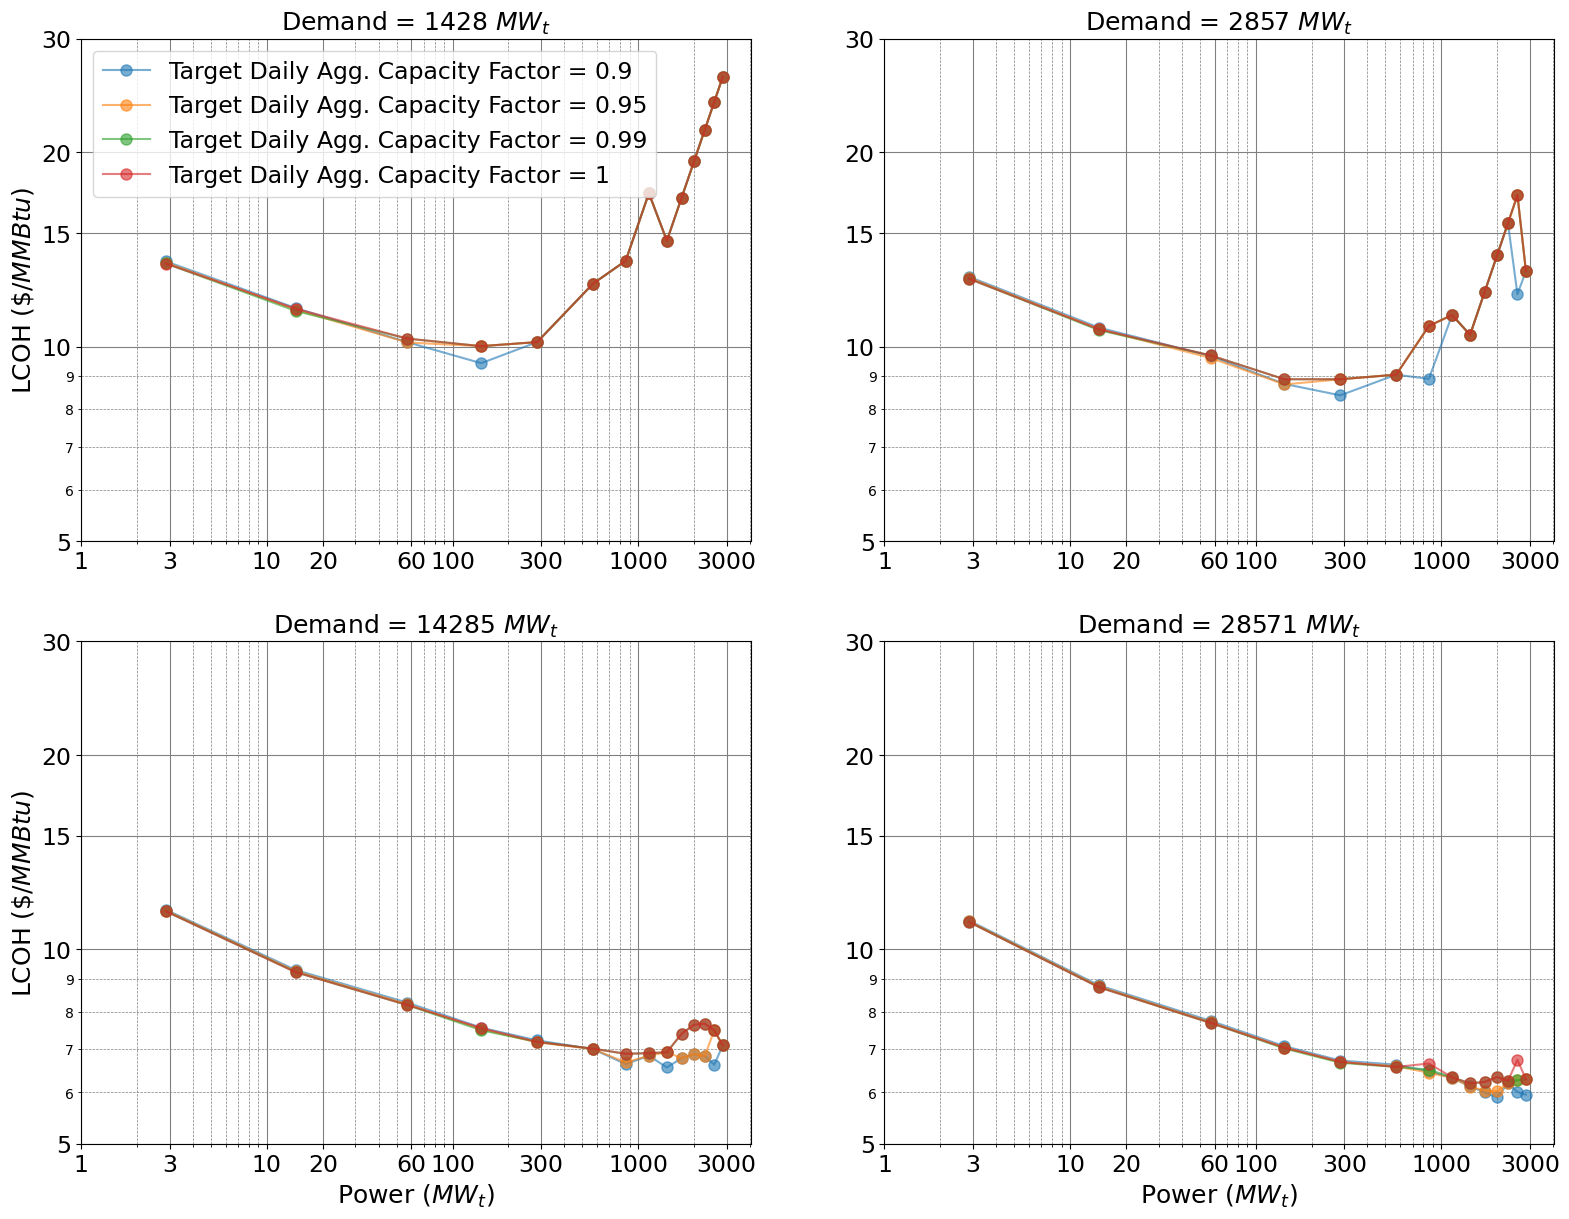

In [14]:
fig = plt.figure(figsize=(19, 30))
dem_list = [500, 1000, 5000, 10000] # MWe


for ii in range (len(dem_list)):
    dem = dem_list[ii]
    # fig = plt.figure(figsize=(8, 5))
    # plt.title( f"Demand  = {dem} $MW_e$ ",  fontsize=18)
 
    plt.subplot(4, 2, ii+1)
    plt.title(f'Demand = {int(dem/0.35)} $MW_t$', fontsize=18)
    dem_data =df_LCOH .loc[df_LCOH['demand'] == dem]
    
    for cap_fact in [0.9, 0.95, 0.99, 1]:
        
        CF_data = dem_data.loc[dem_data['capacity factor criteria'] == cap_fact]
        # multiply bt 3.4 to convert MWth to MMBTU
        plt.plot((CF_data['power'])/(0.35), (CF_data['lcoe_O'])/3.412142, '-o' , markersize = 8,  alpha=0.6 ,label = f"Target Daily Agg. Capacity Factor = {cap_fact}")
        plt.xscale('log')
        plt.yscale('log')
        
        if dem == 500:
            plt.legend( loc='upper left', fontsize=17 , ncol=1)
       
        plt.grid(which='major', color='grey', linewidth=0.8)
    
        plt.gca().yaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
        plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
        plt.gca().xaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
        plt.gca().xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
        
        plt.gca().yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
        plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
        plt.gca().yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
        # plt.gca().xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
        
        plt.yticks([5, 10, 15, 20, 30])
        plt.xticks( [3000,    1000,    300,  100, 60, 20,10, 3, 1])
        
        plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
        plt.minorticks_on()
        
        plt.yticks(fontsize=17)
        plt.xticks(fontsize=17)
        # # plt.ylim( 3, 80)
        
        if dem == 5000 or dem == 10000:
             plt.xlabel('Power ($MW_t$)', fontsize=18)
        if dem == 500 or dem == 5000:     
            plt.ylabel('LCOH ($ \$/MMBtu$)', fontsize=18)
             
plt.savefig('LCOH.png')
plt.show()